In [111]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')





In [112]:
#read the data
bikes = pd.read_csv('Downloads/day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [113]:
bikes.shape

(730, 16)

In [114]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Total records - 730. All individual fields has 730 non null values, so it means there is no missing values

In [116]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 1. instant field does not have any implication on target variable cnt. It's just a serial number. So, it can be removed from the dataset
## 2. dteday feild also does not have any implication on target variable cnt. It's just a data collection date. So, it can be removed from the dataset
## 3. casual and registered fields are redundant columns. Can also be removed from the dataset

In [118]:
bikes = bikes.drop(['instant','dteday','casual','registered'],axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


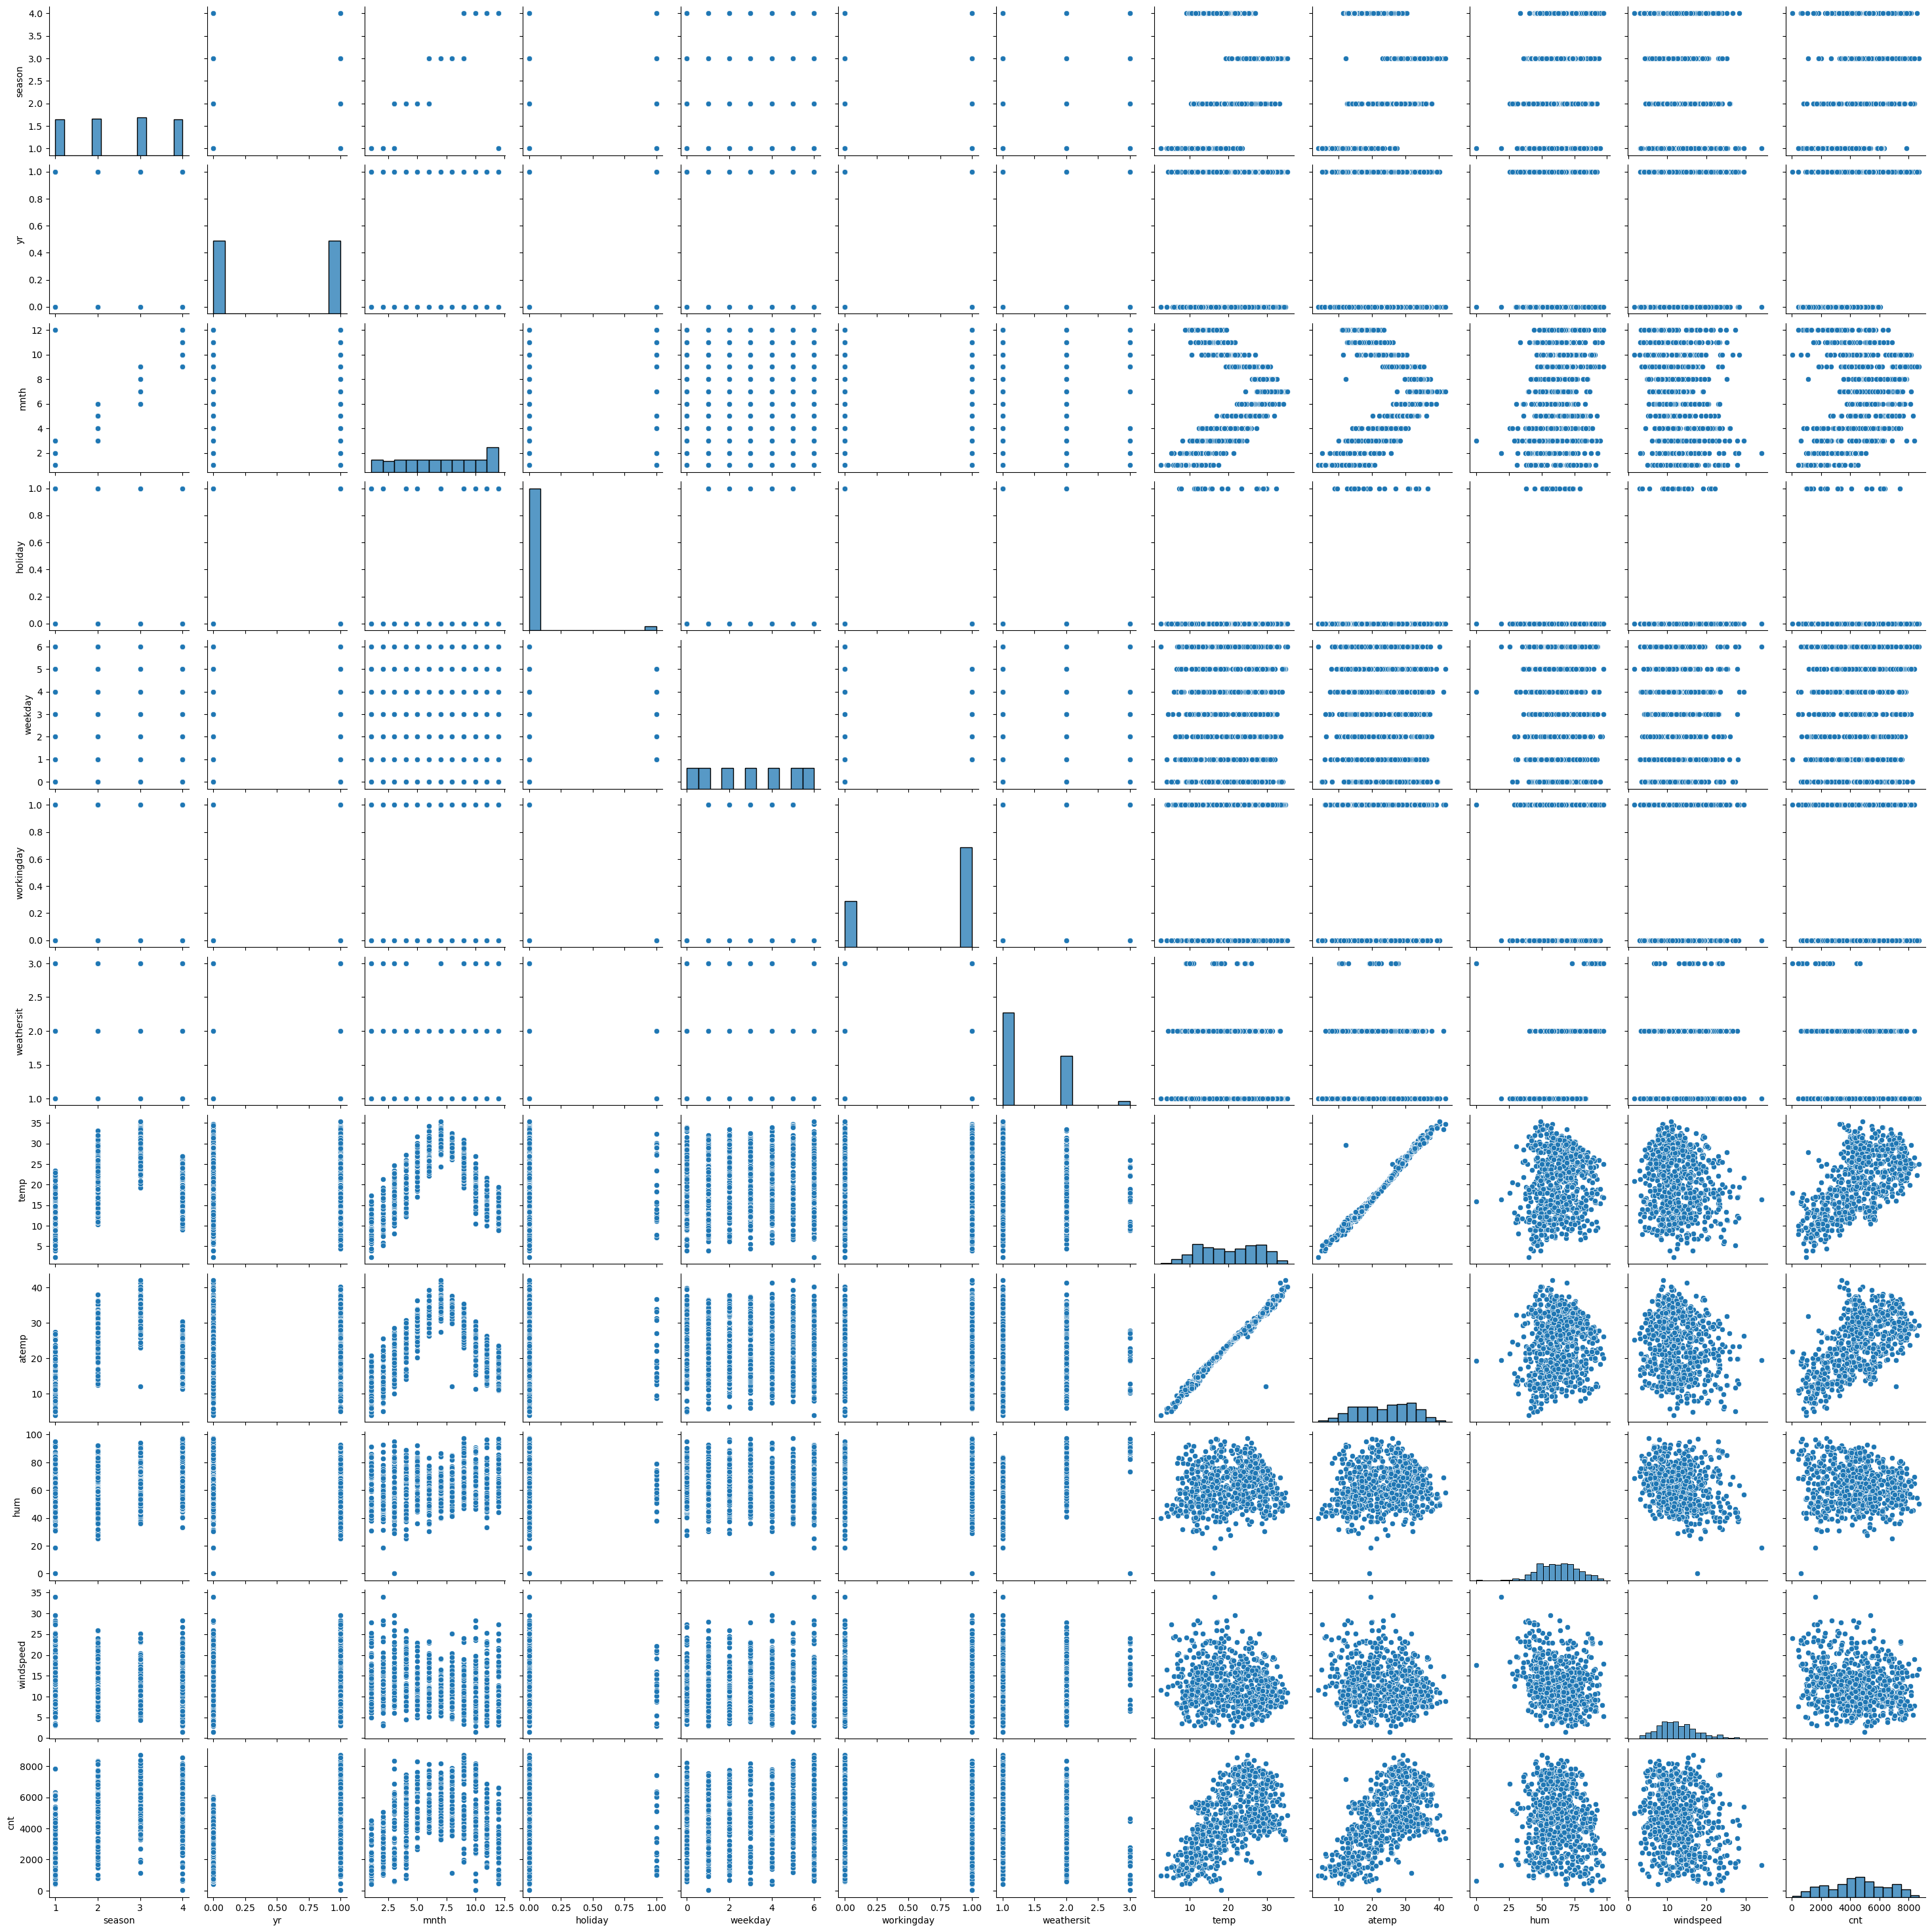

In [119]:
# visualizing the correlation between various predictor variables and target variable
sns.pairplot(bikes)
plt.show()

## Conclusion from the above plot for numerical variables

### 1. There is a positive correlation between cnt and temp and cnt and atemp, as both the temp and atemp increases cnt also increases
### 2. There is no visible correlation between cnt and humidity and between cnt and windspeed

<Axes: xlabel='weathersit', ylabel='cnt'>

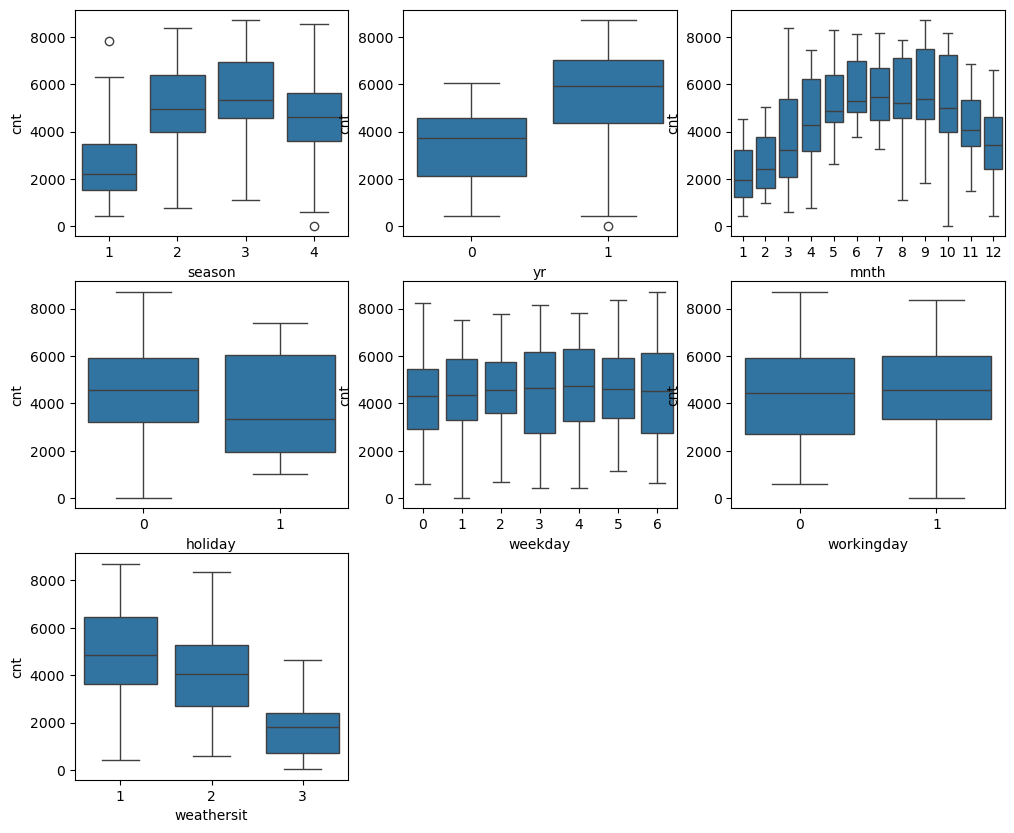

In [121]:
plt.figure(figsize=(12,10))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bikes)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bikes)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bikes)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bikes)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bikes)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bikes)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bikes)

## Conclusion from the above plot for categorical variable
### 1. cnt is comparatively less in spring season, there is not much difference among the medians for other three seasons
### 2. cnt is comparatively higher in 2019 as it has become more popular compared to 2018
### 3. cnt is comparatively high in month 9(September) and 10(October). bike usage is comparatively less in month 1,2,11,12.
### 4. cnt is high in non-holiday days
### 5. median is almost same for all the weekdays. For workingday column, the difference between median is not much between 0 and 1.
### 6. people usually using the bikes during weathersit 1(Clear, Few clouds, Partly cloudy, Partly cloudy) and 2(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)
### and very less in 3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) and none in 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
### 7. Out of all these categorical variables, year, holiday and workingday are binary variables(0 and 1). So, we don't need to convert them. It is 
### already 0 and 1.
### 8. For remaining categorical variable, before converting them to "dummy variables", we need to first name with actual values like for season 
### instead of using 1,2,3,4 we will first convert them into spring, summer, fall, winter. Similar stratgey can be followed for mnth, weekday and 
### weathersit.

In [123]:
# Check the various distinct values of season column
bikes['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [124]:
# Convert the season column to actual categorical values
varlist = ['season']
bikes[varlist] = bikes[varlist].apply(lambda x: x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [125]:
# Check the various distinct values of mnth column
bikes['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [126]:
# Convert the mnth column to actual categorical values
varlist = ['mnth']
bikes[varlist] = bikes[varlist].apply(lambda x: x.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}))
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [127]:
# Check the various distinct values of weekday column
bikes['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [128]:
# Convert the weekday column to actual categorical values
varlist = ['weekday']
bikes[varlist] = bikes[varlist].apply(lambda x: x.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}))
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [129]:
# Check the various distinct values of weathersit column
bikes['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [130]:
# Convert the weathersit column to actual categorical values
varlist = ['weathersit']
bikes[varlist] = bikes[varlist].apply(lambda x: x.map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}))
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [131]:
# Convert the season columns to dummy variable
season = pd.get_dummies(bikes['season'],drop_first=True)
season.head()

,spring,summer,winter
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [132]:
bikes = pd.concat([bikes,season],axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,True,False,False
1,spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,True,False,False
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,True,False,False
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,True,False,False
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,True,False,False


In [133]:
bikes = bikes.drop('season',axis=1)
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,True,False,False
1,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,True,False,False
2,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,True,False,False
3,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,True,False,False
4,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,True,False,False


In [134]:
# Convert the mnth column to dummy variable
mnth = pd.get_dummies(bikes['mnth'],drop_first=True)
mnth.head()

,August,December,February,January,July,June,March,May,November,October,September
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False


In [135]:
bikes = pd.concat([bikes,mnth],axis=1)
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,December,February,January,July,June,March,May,November,October,September
0,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,...,False,False,True,False,False,False,False,False,False,False
1,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,...,False,False,True,False,False,False,False,False,False,False
2,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,...,False,False,True,False,False,False,False,False,False,False
3,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,...,False,False,True,False,False,False,False,False,False,False
4,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,...,False,False,True,False,False,False,False,False,False,False


In [136]:
bikes = bikes.drop('mnth',axis=1)
bikes.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,December,February,January,July,June,March,May,November,October,September
0,0,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,...,False,False,True,False,False,False,False,False,False,False
1,0,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,...,False,False,True,False,False,False,False,False,False,False
2,0,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,False,False,True,False,False,False,False,False,False,False
3,0,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,False,False,True,False,False,False,False,False,False,False
4,0,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,False,False,True,False,False,False,False,False,False,False


In [137]:
# Convert the weekday column to dummy variable
weekday = pd.get_dummies(bikes['weekday'],drop_first=True)
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,False,True,False,False,False,False
1,False,False,True,False,False,False
2,True,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,True


In [138]:
bikes = pd.concat([bikes,weekday],axis=1)
bikes.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,...,False,False,False,False,False,True,False,False,False,False
1,0,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,...,False,False,False,False,False,False,True,False,False,False
2,0,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,False,False,False,False,True,False,False,False,False,False
3,0,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,False,False,False,False,False,False,False,False,True,False
4,0,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,False,False,False,False,False,False,False,False,False,True


In [139]:
bikes = bikes.drop('weekday',axis=1)
bikes.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,Mist,14.110847,18.18125,80.5833,10.749882,985,True,...,False,False,False,False,False,True,False,False,False,False
1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,True,...,False,False,False,False,False,False,True,False,False,False
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,True,...,False,False,False,False,True,False,False,False,False,False
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,True,...,False,False,False,False,False,False,False,False,True,False
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,True,...,False,False,False,False,False,False,False,False,False,True


In [140]:
# Convert the weathersit column to dummy variable
weathersit = pd.get_dummies(bikes['weathersit'],drop_first=True)
weathersit.head()

,Light Snow,Mist
0,False,True
1,False,True
2,False,False
3,False,False
4,False,False


In [141]:
bikes = pd.concat([bikes,weathersit],axis=1)
bikes.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,0,0,0,Mist,14.110847,18.18125,80.5833,10.749882,985,True,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,True,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,True,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,True,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,True,...,False,False,False,False,False,False,False,True,False,False


In [142]:
bikes = bikes.drop('weathersit',axis=1)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,False,False


In [143]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    bool   
 9   summer      730 non-null    bool   
 10  winter      730 non-null    bool   
 11  August      730 non-null    bool   
 12  December    730 non-null    bool   
 13  February    730 non-null    bool   
 14  January     730 non-null    bool   
 15  July        730 non-null    bool   
 16  June        730 non-null    bool   
 17  March       730 non-null    bool   
 18  May         730 non-null    bool   
 19  November    730 non-null    b

In [144]:
# Converting True and False to 1 and 0 respectively
varlist = ['spring','summer','winter','August','December','February','January','July','June','March','May','November','October'\
           ,'September','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday','Light Snow','Mist']
bikes[varlist] = bikes[varlist].apply(lambda x: x.map({True:1,False:0}))
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [145]:
# Splitting the dataset into train and test
df_train,df_test = train_test_split(bikes,train_size = 0.7,random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [146]:
#instantiate an object
scaler = MinMaxScaler()

# create a list of numeric vars
num_varlist = ['temp','atemp','hum','windspeed']

# fir_transform on data
df_train[num_varlist] = scaler.fit_transform(df_train[num_varlist])
df_train.head()



,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [147]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,4485.337255,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,1950.666077,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


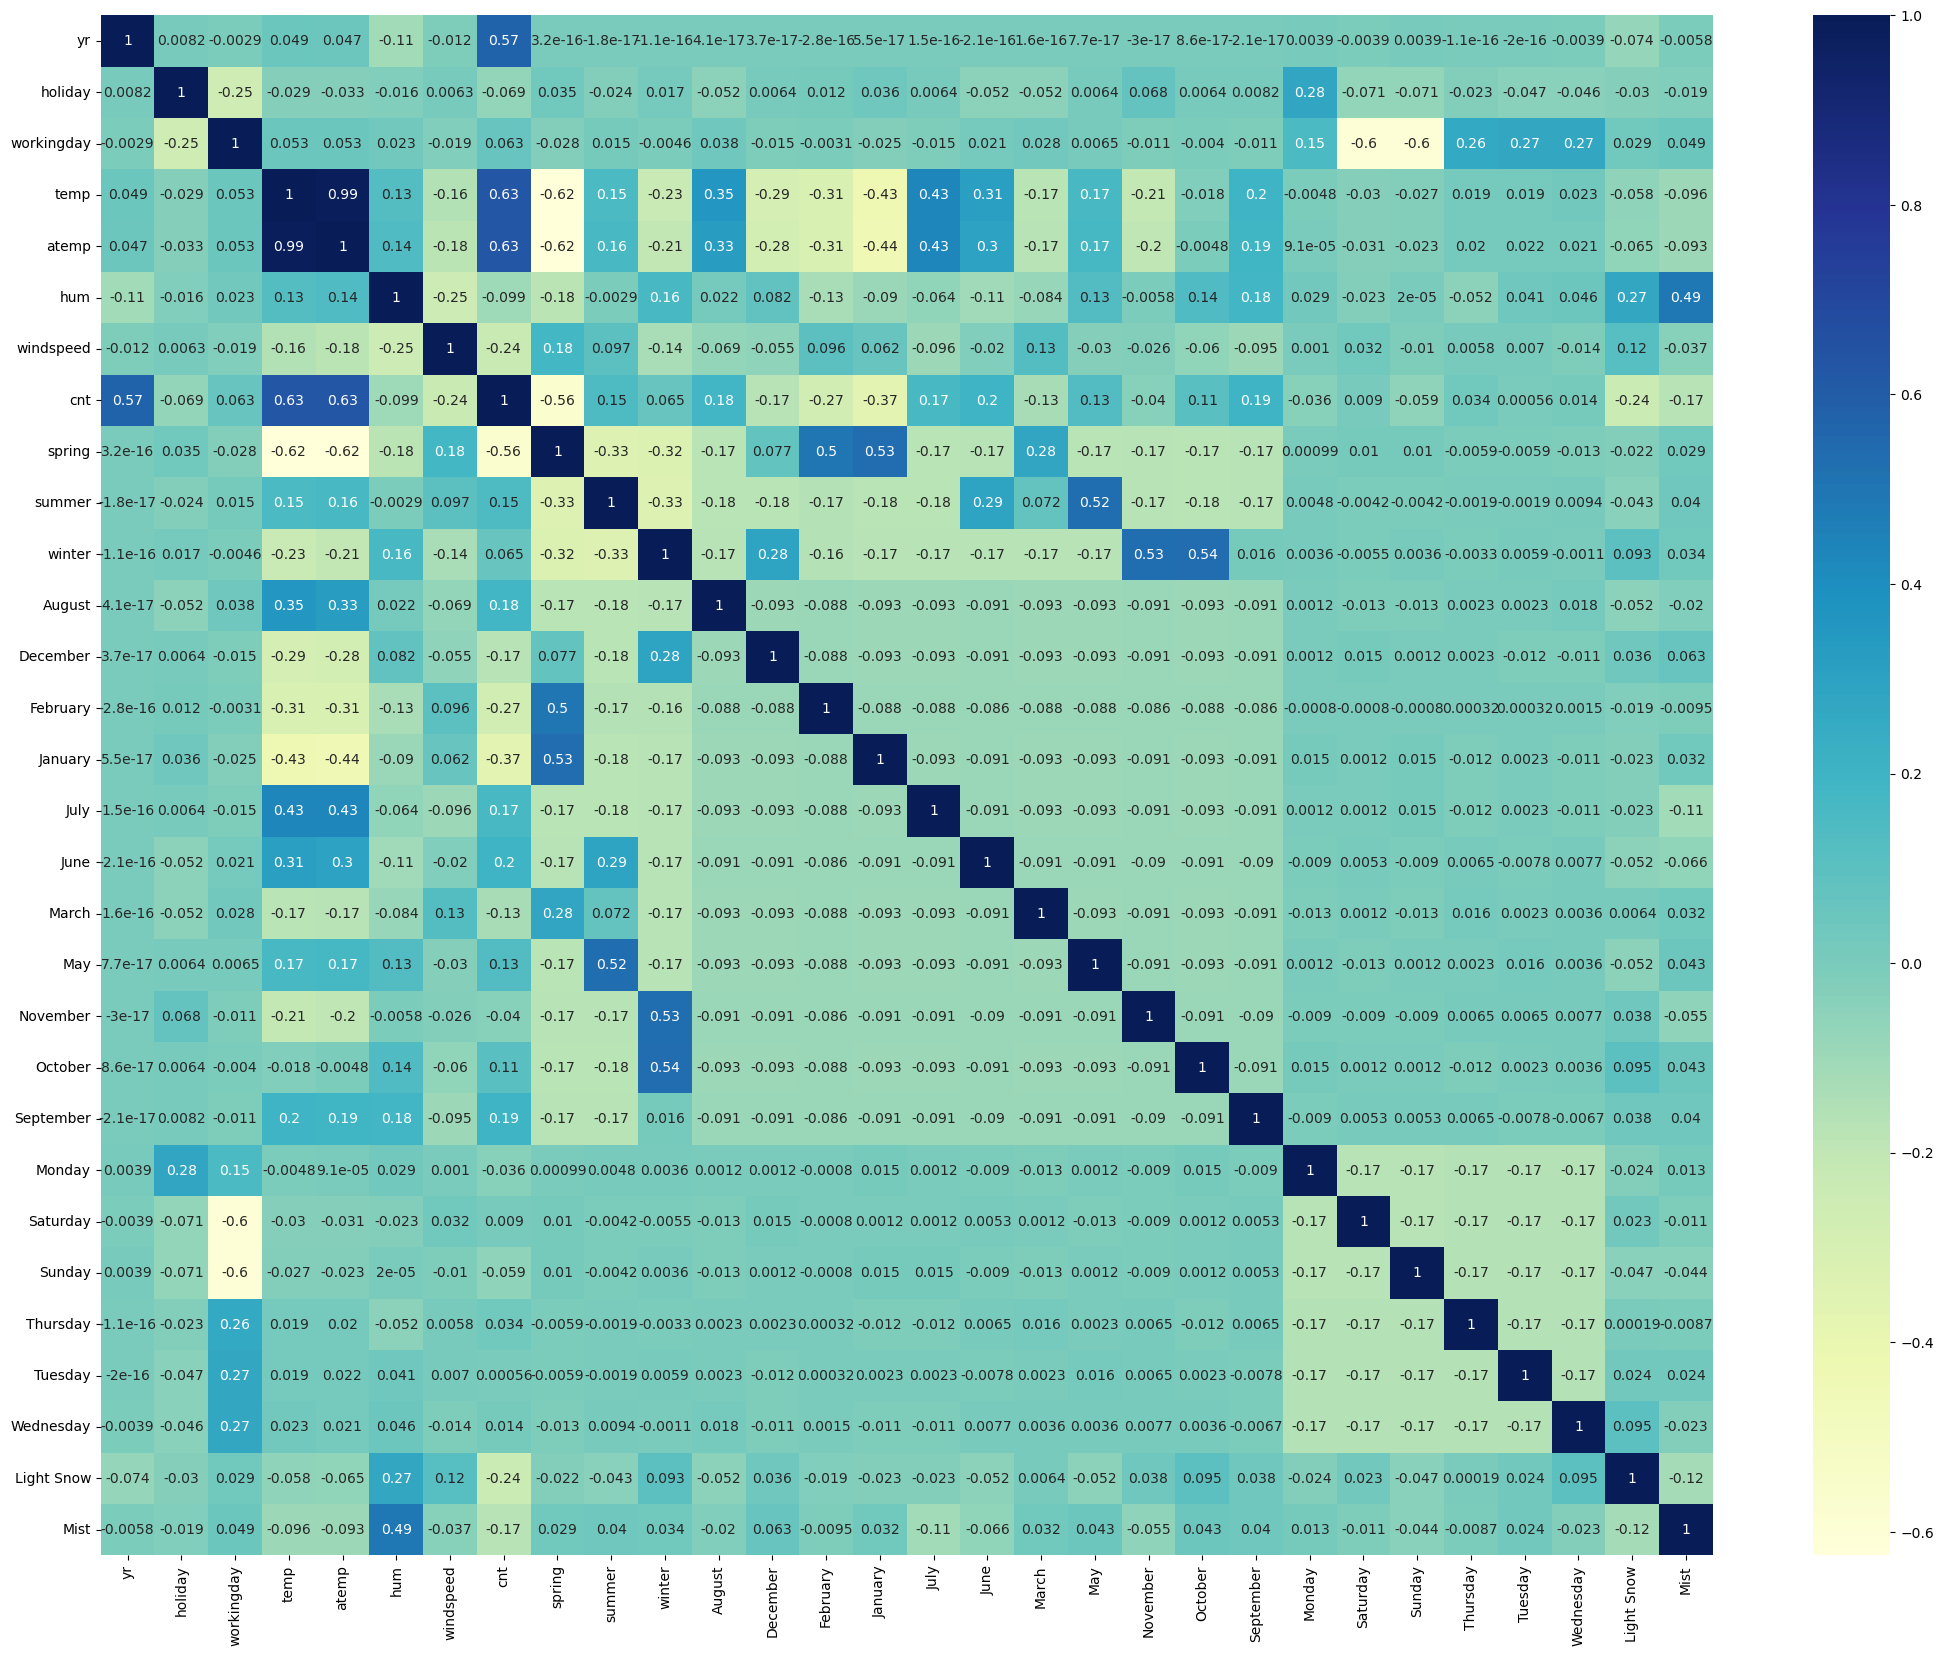

In [148]:
# create a heatmap to understand the correlation between the variables
plt.figure(figsize = (26,20))
sns.heatmap(bikes.corr(),annot=True,cmap='YlGnBu')
plt.show()

### Since, we have total 30 columns, let's use Recursive Feature Elimination first

In [150]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [151]:
# Creating X-train and y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [152]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [153]:
# Running RFE with output number of variable equal to 30
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm, step=30)
rfe = rfe.fit(X_train,y_train)

In [154]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('August', False, 2),
 ('December', False, 2),
 ('February', False, 2),
 ('January', True, 1),
 ('July', False, 2),
 ('June', False, 2),
 ('March', False, 2),
 ('May', False, 2),
 ('November', False, 2),
 ('October', False, 2),
 ('September', True, 1),
 ('Monday', False, 2),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 2),
 ('Tuesday', False, 2),
 ('Wednesday', False, 2),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [155]:
# RFE selected columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'January', 'September', 'Saturday', 'Sunday', 'Light Snow',
       'Mist'],
      dtype='object')

## Building model using statsmodel, using detailed statistics 

In [157]:
# creating X_train dataframe using RFE selected columns
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,winter,January,September,Saturday,Sunday,Light Snow,Mist
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,1


In [158]:
# Adding a constant variable
import statsmodels.api as sm 
X_train_rfe = sm.add_constant(X_train_rfe)

In [159]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [160]:
# Summary of the Linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.3
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          7.36e-187
Time:                        10:03:56   Log-Likelihood:                -4121.8
No. Observations:                 510   AIC:                             8272.
Df Residuals:                     496   BIC:                             8331.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2262.8235    224.291     10.089      0.0

## Now,let's check the multicolinearity of the predictor variables

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [163]:
# create a dataframe that will contain the name of all the feature variable and their respective VIF values
X_train_col = X_train[col]
vif = pd.DataFrame()
vif['Features'] = X_train_col.columns
vif['VIF'] = [variance_inflation_factor(X_train_col.values, i) for i in range(X_train_col.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,41.38
10,Saturday,10.11
11,Sunday,9.79
3,temp,2.76
6,spring,2.70
1,holiday,2.57
4,hum,1.87
7,winter,1.81
13,Mist,1.57
8,January,1.54


## The VIF value is too high for workingday. Let's remove the column from training dataset

In [165]:
X_train_rfe = X_train_rfe.drop(['workingday'],axis=1)
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,spring,winter,January,September,Saturday,Sunday,Light Snow,Mist
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,1,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,1


In [166]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [167]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.3
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          7.36e-187
Time:                        10:03:56   Log-Likelihood:                -4121.8
No. Observations:                 510   AIC:                             8272.
Df Residuals:                     496   BIC:                             8331.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3126.6519    274.919     11.373      0.000    2586.502    3666.802
yr          2029.3193     71.451     28.402      0.000    1888.936    2169.702
holiday     -877.1008    226.327     -3.875      0.000   -1321.779    -432.422
temp        3557.9290    258.732     13.751      0.000    3049.583    4066.275
hum        -1090.5574    330.088     -3.304      0.001   -1739.101    -442.014
windspeed  -1471.3100    225.866     -6.514      0.000   -1915.081   -1027.539
spring      -900.0471    134.723     -6.681      0.000   -1164.745    -635.349
winter       440.5385    109.703      4.016      0.000     225.000     656.078
January     -410.7388    153.769     -2.671      0.008    -712.858    -108.619
September    625.8009    133.927      4.673      0.000     362.667     888.935
Saturday      78.3921     99.409      0.789      0.431    -116.922     273.706
Sunday      -393.7814    102.931     -3.826      0.000    -596.015    -191.547
Light Snow -2258.7457    231.959     -9.738      0.000   -2714.490   -1803.001
Mist        -503.0932     92.548     -5.436      0.000    -684.928    -321.259
==============================================================================
Omnibus:                       70.094   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.803
Skew:                          -0.695   Prob(JB):                     9.04e-40
Kurtosis:                       5.555   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
# create a dataframe that will contain the name of all the feature variable and their respective VIF values
X_train_col = X_train_rfe.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_col.columns
vif['VIF'] = [variance_inflation_factor(X_train_col.values, i) for i in range(X_train_col.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,22.66
2,temp,13.56
4,windspeed,4.03
5,spring,2.90
12,Mist,2.26
6,winter,2.12
0,yr,2.06
7,January,1.65
9,Saturday,1.23
10,Sunday,1.23


## The VIF value is too high for hum. Let's remove the column from training dataset

In [222]:
X_train_rfe = X_train_rfe.drop(['hum'],axis=1)
X_train_rfe.head()

,const,yr,holiday,temp,windspeed,spring,winter,January,September,Saturday,Sunday,Light Snow,Mist
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,1,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,1,0,0,1
111,1.0,0,0,0.345824,0.380981,0,0,0,0,0,0,0,1


In [224]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [226]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.7
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.07e-185
Time:                        10:06:47   Log-Likelihood:                -4127.3
No. Observations:                 510   AIC:                             8281.
Df Residuals:                     497   BIC:                             8336.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2536.8365    211.144     12.015      0.000    2121.992    2951.681
yr          2055.0516     71.730     28.650      0.000    1914.121    2195.982
holiday     -882.0010    228.569     -3.859      0.000   -1331.082    -432.921
temp        3372.0819    255.050     13.221      0.000    2870.973    3873.191
windspeed  -1271.2551    219.757     -5.785      0.000   -1703.023    -839.487
spring      -918.5262    135.943     -6.757      0.000   -1185.620    -651.432
winter       371.3045    108.751      3.414      0.001     157.635     584.973
January     -433.9133    155.134     -2.797      0.005    -738.713    -129.114
September    593.4935    134.895      4.400      0.000     328.459     858.529
Saturday      91.6394    100.314      0.914      0.361    -105.452     288.731
Sunday      -413.9414    103.770     -3.989      0.000    -617.822    -210.060
Light Snow -2558.0636    215.655    -11.862      0.000   -2981.771   -2134.356
Mist        -679.7076     76.298     -8.909      0.000    -829.613    -529.802
==============================================================================
Omnibus:                       69.734   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.025
Skew:                          -0.701   Prob(JB):                     1.63e-38
Kurtosis:                       5.495   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
# create a dataframe that will contain the name of all the feature variable and their respective VIF values
X_train_col = X_train_rfe.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_col.columns
vif['VIF'] = [variance_inflation_factor(X_train_col.values, i) for i in range(X_train_col.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,windspeed,3.99
2,temp,3.91
4,spring,2.26
0,yr,2.06
6,January,1.60
11,Mist,1.52
5,winter,1.40
8,Saturday,1.23
9,Sunday,1.21
7,September,1.16


## None of the columns have VIF values greater than 5. So, no need to remove any column for multicolinearity 

## However, p value of Saturday column is comparatively higher and let's see whether removing this column from the dataset improves the R square

In [232]:
X_train_rfe = X_train_rfe.drop(['Saturday'],axis=1)
X_train_rfe.head()

,const,yr,holiday,temp,windspeed,spring,winter,January,September,Sunday,Light Snow,Mist
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.380981,0,0,0,0,0,0,1


In [234]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [236]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.8
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.05e-186
Time:                        10:13:19   Log-Likelihood:                -4127.7
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     498   BIC:                             8330.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2552.7070    210.393     12.133      0.000    2139.340    2966.074
yr          2052.9573     71.681     28.640      0.000    1912.123    2193.792
holiday     -900.3377    227.648     -3.955      0.000   -1347.607    -453.069
temp        3369.1702    254.988     13.213      0.000    2868.186    3870.155
windspeed  -1261.9217    219.483     -5.750      0.000   -1693.149    -830.694
spring      -917.6560    135.917     -6.752      0.000   -1184.698    -650.614
winter       373.9888    108.694      3.441      0.001     160.434     587.543
January     -432.4290    155.100     -2.788      0.006    -737.159    -127.699
September    593.9492    134.872      4.404      0.000     328.961     858.937
Sunday      -431.2120    102.016     -4.227      0.000    -631.647    -230.777
Light Snow -2557.7213    215.619    -11.862      0.000   -2981.356   -2134.087
Mist        -680.1564     76.283     -8.916      0.000    -830.033    -530.280
==============================================================================
Omnibus:                       65.866   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.634
Skew:                          -0.655   Prob(JB):                     2.41e-37
Kurtosis:                       5.494   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Although, the R square did not improve from .835 in this iteration, we got rid of Saturday column which has lesser significance in predicating the target variable

In [238]:
# create a dataframe that will contain the name of all the feature variable and their respective VIF values
X_train_col = X_train_rfe.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_col.columns
vif['VIF'] = [variance_inflation_factor(X_train_col.values, i) for i in range(X_train_col.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,windspeed,3.95
2,temp,3.84
4,spring,2.25
0,yr,2.06
6,January,1.60
10,Mist,1.52
5,winter,1.38
8,Sunday,1.18
7,September,1.16
9,Light Snow,1.08


## Residual Analysis

In [244]:
y_train_pred = lm.predict(X_train_rfe)

<Axes: ylabel='Density'>

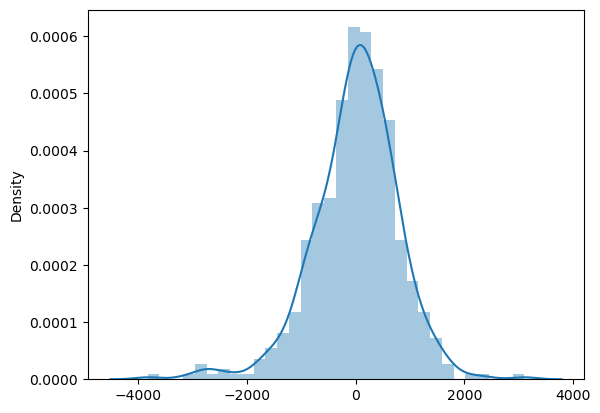

In [246]:
res = y_train - y_train_pred
sns.distplot(res)

## So, the distribution of the residual values/errors is normal and centered around 0

## Last Step - Prediction and Evaluation on the test set

In [253]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          220 non-null    int64  
 1   holiday     220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   temp        220 non-null    float64
 4   atemp       220 non-null    float64
 5   hum         220 non-null    float64
 6   windspeed   220 non-null    float64
 7   cnt         220 non-null    int64  
 8   spring      220 non-null    int64  
 9   summer      220 non-null    int64  
 10  winter      220 non-null    int64  
 11  August      220 non-null    int64  
 12  December    220 non-null    int64  
 13  February    220 non-null    int64  
 14  January     220 non-null    int64  
 15  July        220 non-null    int64  
 16  June        220 non-null    int64  
 17  March       220 non-null    int64  
 18  May         220 non-null    int64  
 19  November    220 non-null    int6

In [255]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,20.808400,24.250312,61.934025,12.598352,4560.559091,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,7.672796,8.281075,14.429542,4.973534,1904.968544,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.299153,31.124313,72.179375,15.385361,5913.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [257]:
# create a list of numeric vars
num_varlist = ['temp','atemp','hum','windspeed']

# transform on test data
df_test[num_varlist] = scaler.transform(df_test[num_varlist])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


In [259]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,4560.559091,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,1904.968544,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,5913.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [261]:
# creating X_test and y_test from df_test
y_test = df_test.pop('cnt')
X_test = df_test

In [263]:
# Add a constant to the X_test dataset
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,1,0,0,0,0,1,0,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,0,0,1,0,0,0,0


In [265]:
print(X_train_rfe.columns)

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter',
       'January', 'September', 'Sunday', 'Light Snow', 'Mist'],
      dtype='object')


In [269]:
X_test_sm = X_test_sm[X_train_rfe.columns]
X_test_sm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter',
       'January', 'September', 'Sunday', 'Light Snow', 'Mist'],
      dtype='object')

In [271]:
X_test_sm.head()

,const,yr,holiday,temp,windspeed,spring,winter,January,September,Sunday,Light Snow,Mist
184,1.0,0,1,0.831783,0.084219,0,0,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0,0,0


In [279]:
# predict
y_test_pred = lm.predict(X_test_sm)

In [275]:
# importing r2_score from sklearn
from sklearn.metrics import r2_score

In [281]:
# evaluate the model based on test data
r2_score(y_true=y_test,y_pred=y_test_pred)

0.803201341138581

## r2_score on train set is 0.83 whereas on test set is 0.80 which seems to be pretty reasonable. 
## Whatever the model has learnt from train set, it can generalized it pretty well on test set.

## So, we can see that equation of best fitted line is:
### cnt = 2553 + 2053 x yr -900 x holiday + 3369 x temp - 1262 x windspeed - 918 x spring + 374 x winter - 432 x January + 594 x September - 431 x Sunday - 2558 x Light Snow - 680 x Mist